In [74]:
import datetime
import dateutil.parser
from dateutil.relativedelta import relativedelta
import nltk
import glob
import os
import time

import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd

from gensim.models import Word2Vec
from mpl_toolkits.mplot3d import Axes3D
from nltk import FreqDist

from sklearn.cluster import KMeans
import seaborn as sns

%matplotlib inline

In [23]:
import dataloader
import textprocessor

In [24]:
stopwords = dataloader.load_stopwords("data/stopwords")
len(stopwords)

560

In [25]:
documents = dataloader.load_data("data/posts/*")
len(documents)

53

# Document Analysis

In [101]:
documents = textprocessor.process_documents(documents)

[585, 555, 482, 258, 308, 250, 545, 2, 783, 1053, 408, 1113, 619, 902, 756, 959, 796, 1197, 394, 606, 536, 1033, 1403, 677, 523, 681, 38, 148, 475, 246, 169, 524, 453, 518, 431, 6, 394, 919, 1670, 599, 84, 334, 158, 292, 799, 488, 540, 295, 177, 1239, 693, 630, 303]
566.9056603773585


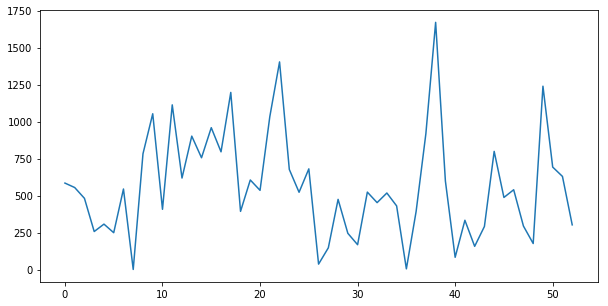

In [102]:
# tokenize
tokens = [nltk.word_tokenize(doc) for doc in documents]

# tokenize -> preprocess
#tokens = [textprocessor.remove_stopwords(nltk.word_tokenize(doc), stopwords) for doc in documents]
tokens = [ list(filter(lambda t : t=='i' or len(t)>1, token_list))  for token_list in tokens ]
documents_lengths = list(map(lambda x : len(x), tokens))
print(documents_lengths)
print(np.mean(documents_lengths))
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(documents_lengths)

### Time Series Analysis
Here, I have rendered manual (and inefficient) time series plot based on the blog posts creation date. For this,
initially, I created a certain date range between 2015 and 2019 with increment in days. Then I extracted the creation date from each of the documents and create a impulse-response type of plot by putting **1** where the creation date occured.

53


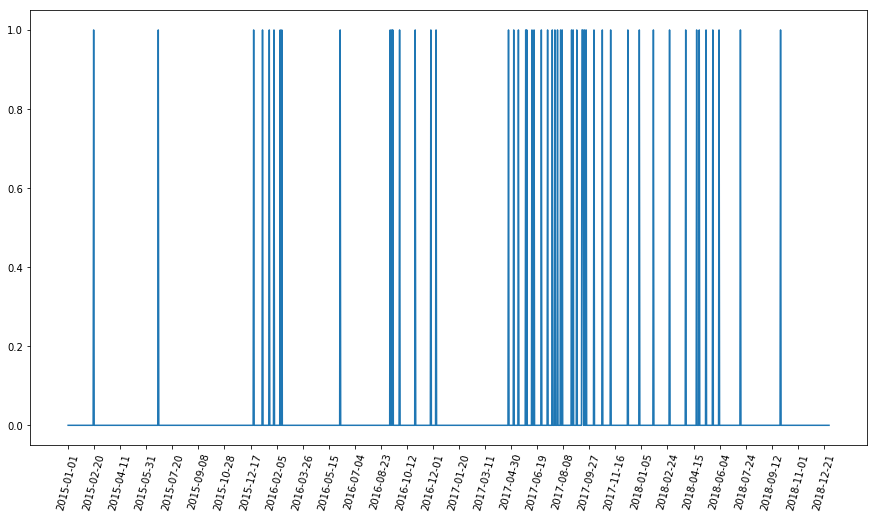

In [142]:
filenames = glob.glob('data/posts/*')
n = len('data/posts/20XX-XX-XXTXX:XX:XX.XXXZ-')
#filenames = [ fname[n:] for fname in filenames ]
print(len(filenames))
start = len('data/posts/')
diff = len('20XX-XX-XXTXX:XX:XX.XXXZ')

dates = [dateutil.parser.parse(fn[start : start+diff]).replace(hour=0, minute=0, second=0, microsecond=0) for fn in filenames]
#print(dates)
start_date = dateutil.parser.parse("2015-01-01T00:00:00.000Z")
end_date = dateutil.parser.parse("2019-01-01T00:00:00.000Z")

date_range = [start_date+relativedelta(days=i) for i in range((end_date - start_date).days)]

res = []
for i, d in enumerate(date_range):
    if d in dates:
        res.append(1)
    else:
        res.append(0)


plt.rcParams['figure.figsize'] = (15, 8)

fig, ax = plt.subplots()

#ax.set_xticks([i for i in range(0, len(date_range), 75)])
#ax.set_xticklabels( [str(date_range[i])[:10] for i in range(0, len(date_range), 75)])
#ax.plot(res)
dt = 50
plt.xticks(
    [i for i in range(0, len(date_range), dt)], 
    [str(date_range[i])[:10] for i in range(0, len(date_range), dt)],
    rotation=75
)
plt.plot(res)
#plt.plot(res, marker='.', linestyle='')

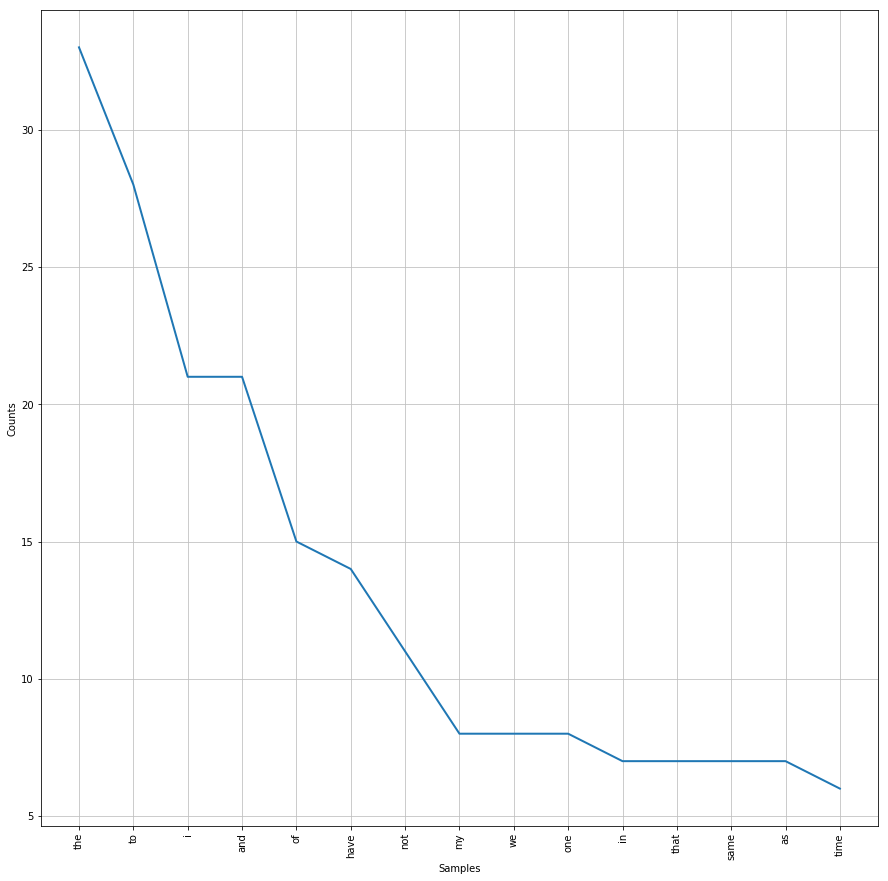

In [13]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 15
freq = FreqDist(tokens[1])
freq.plot(15, cumulative=False)

In [9]:
# train model
#word2vec = Word2Vec(tokens, min_count=3, size=65, sg=1, window=5)
word2vec = Word2Vec(
    tokens,
    sg=1,
    workers=multiprocessing.cpu_count(),
    size=300,
    min_count=2,
    window=5,
    sample=1e-3
)

# access vocabulary
vocabs = list(word2vec.wv.vocab)
print(len(vocabs))
word2vec.wv.syn0.shape

2031


/home/paradox/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  app.launch_new_instance()


(2031, 300)

In [10]:
# access vector
print(word2vec['paradox'])

[-0.06644089 -0.0059675   0.05919358  0.03209656  0.08957222 -0.10491838
 -0.0381729  -0.10090206  0.08200918  0.04863009 -0.04869002 -0.09698541
  0.10775713  0.04161902  0.0634113  -0.03232371  0.05001966 -0.04605561
  0.00491616 -0.05978156 -0.07641683  0.05362759 -0.12163623 -0.06987117
  0.06680436 -0.04141194  0.02215656 -0.02670397  0.04706659  0.11054303
 -0.06404172 -0.04807809 -0.01285564  0.14343737 -0.02331526  0.06354194
 -0.0091959  -0.00426702 -0.0032947   0.10975562 -0.09086636  0.05082611
  0.04752176 -0.00898207  0.00975802  0.0795902  -0.06703219  0.00859717
  0.06561927 -0.0475768   0.06093777 -0.03906799  0.01007691  0.07264904
 -0.04549476 -0.12316886  0.02144922 -0.04883369  0.02099447 -0.06828265
 -0.04720467  0.04201498 -0.12621075  0.11255643  0.0481362   0.20614506
  0.04896471  0.04381356  0.0639324   0.10600214  0.02342184 -0.2165007
 -0.0404269  -0.0560053   0.11270766  0.13094811  0.09451061  0.03923294
 -0.1914286  -0.10426702  0.09744017  0.10387155  0.

/home/paradox/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [11]:
# save model
word2vec.save('data/nishparadox.bin')

In [12]:
word2vec.wv.vocab['i'].count

951

In [13]:
# remove stopwords
vocabs_filtered = textprocessor.remove_stopwords(vocabs, stopwords)
# remove single character
vocabs_filtered = list(filter(lambda s : len(s)>1, vocabs_filtered))
len(vocabs_filtered)

1707

In [14]:
# get sorted vocab with count
vocab_counts = sorted([ (v, word2vec.wv.vocab[v].count) for v in vocabs_filtered ], key = lambda x : x[1], reverse=True)
vocab_counts[:10]

[('life', 206),
 ('time', 143),
 ('number', 142),
 ('people', 132),
 ('mind', 86),
 ('world', 71),
 ('love', 62),
 ('things', 59),
 ('thoughts', 56),
 ('feel', 52)]

In [15]:
# get top n words
n = 250
words, counts = zip(*vocab_counts)
vocabs_topn = words[:n]
vocabs_topn[:10]

('life',
 'time',
 'number',
 'people',
 'mind',
 'world',
 'love',
 'things',
 'thoughts',
 'feel')

/home/paradox/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


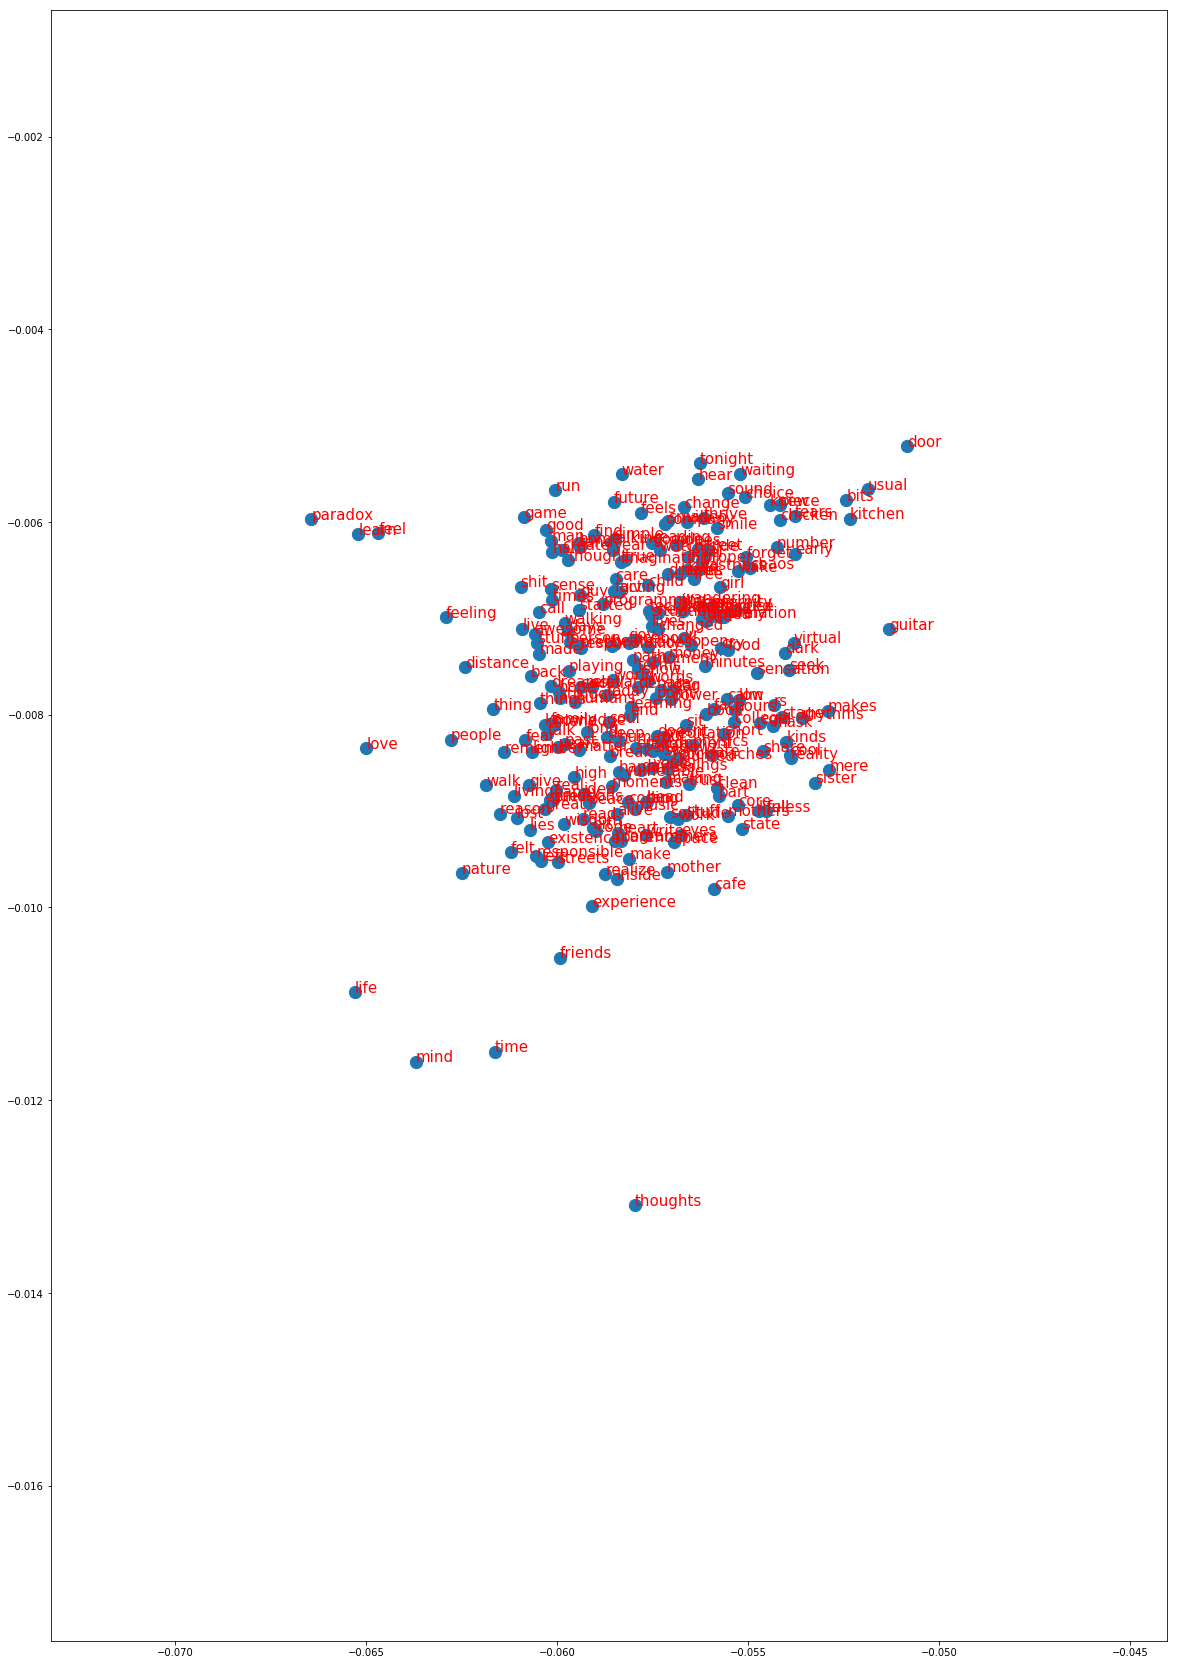

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 30
# get vectors
vectors = word2vec[vocabs_topn]
#print(vectors)
X = vectors[:, 0]
Y = vectors[:, 1]
Z = vectors[:, 2]
#plt.scatter(X, Y)

# plot
fig, ax = plt.subplots()
ax.scatter(X, Y, s=150)

for i, txt in enumerate(vocabs_topn[:]):
    ax.annotate(txt, (X[i],Y[i]), color='red', size='15')
    #ax.text(Xp[i], Yp[i], Zp[i], txt, color='red')
plt.show()

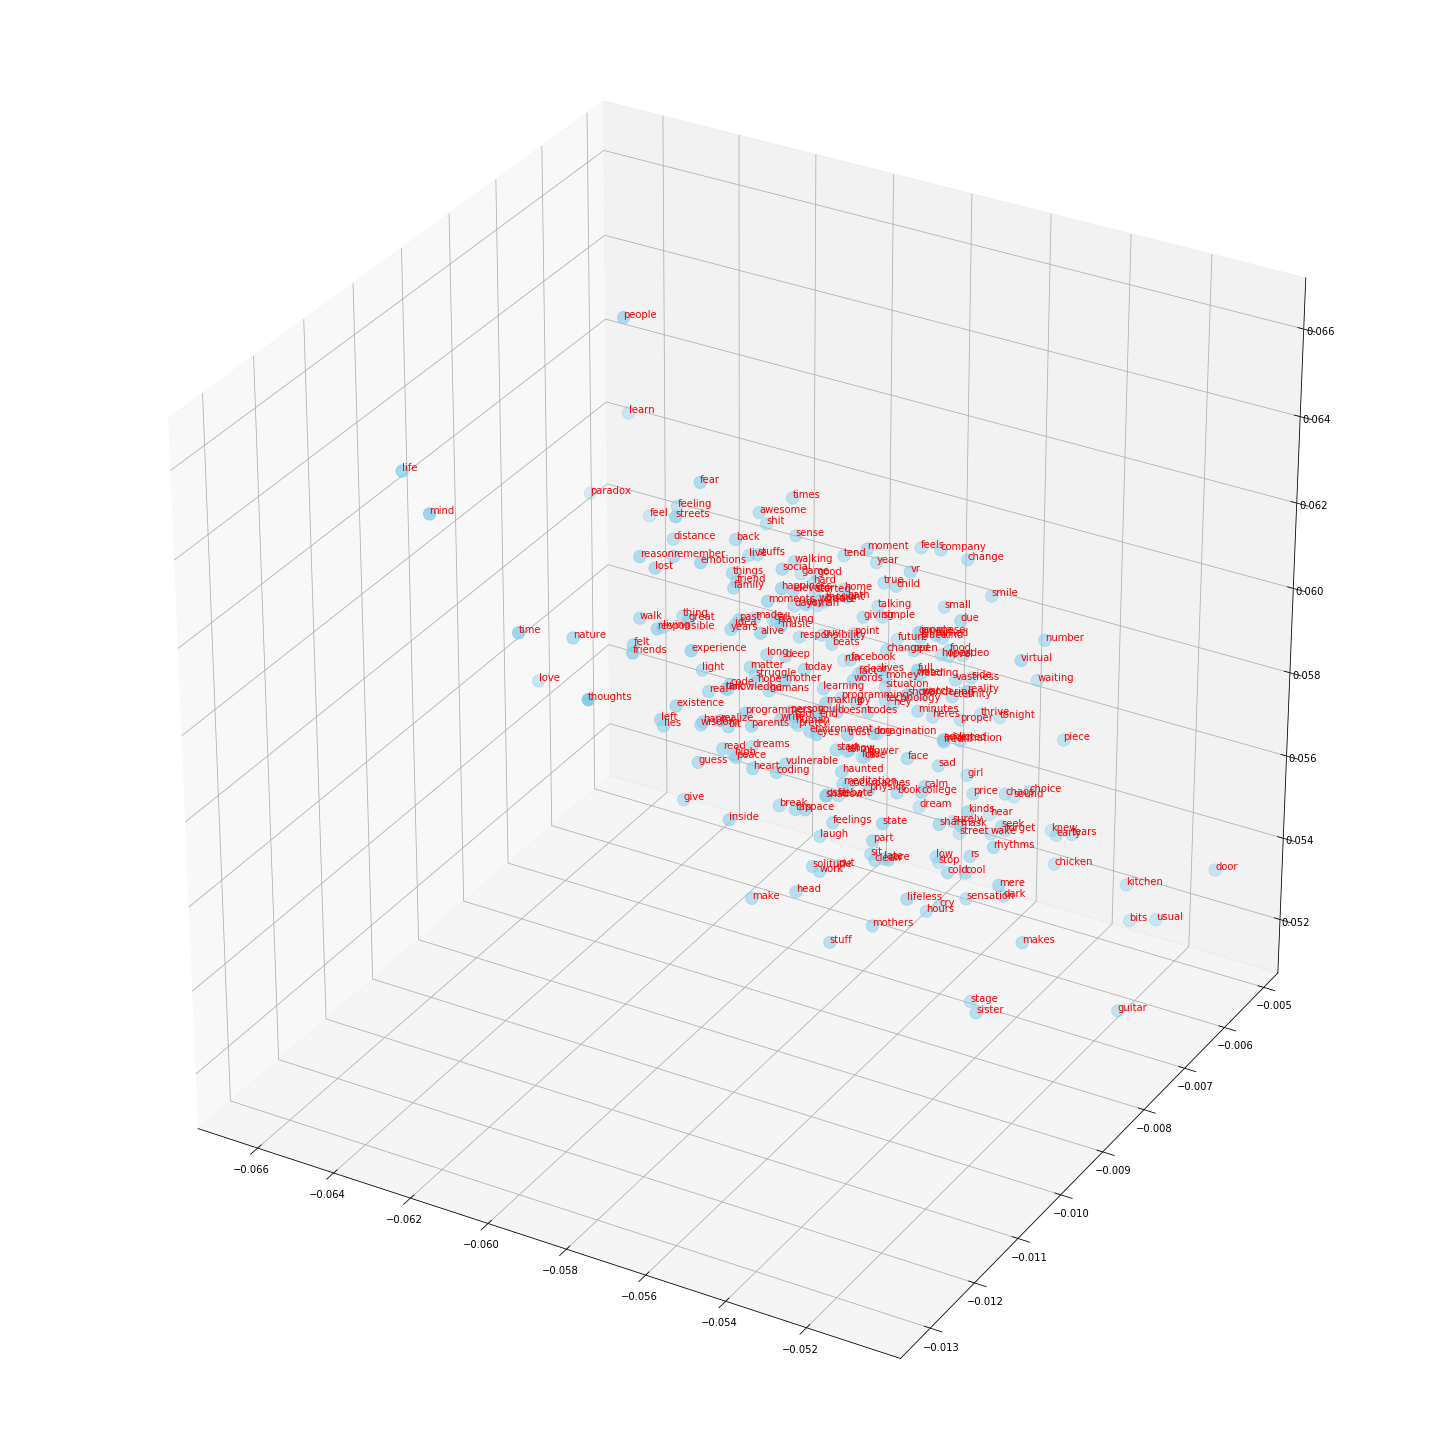

In [17]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20
# plotj
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c='skyblue', s=150)

for i, txt in enumerate(vocabs_topn):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    ax.text(X[i], Y[i], Z[i], txt, color='red')
plt.show()

In [18]:
# get most similar
word2vec.most_similar(positive=['caffeine'])

/home/paradox/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('talking', 0.9998437762260437),
 ('anyone', 0.9998403787612915),
 ('code', 0.9998385310173035),
 ('uncanny', 0.9998361468315125),
 ('interest', 0.9998355507850647),
 ('magic', 0.9998347163200378),
 ('idea', 0.9998346567153931),
 ('understand', 0.9998341798782349),
 ('head', 0.9998336434364319),
 ('seemed', 0.9998326897621155)]

In [19]:
res = word2vec['life'] - word2vec['caffeine']
np.dot(res, word2vec['death'])/(np.linalg.norm(res) * np.linalg.norm(word2vec['death']))

/home/paradox/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/home/paradox/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


0.9348189

### Principal Component Analysis
Let's project nd vector to lower dimension using PCA

In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [23]:
vectors.shape

(250, 300)

In [24]:
pca2d = PCA(n_components=2)
comp2d = pca2d.fit_transform(vectors)
#comp2d = pca2d.fit_transform(word2vec.vectors)
print(comp2d.shape)

pca3d = PCA(n_components=3)
comp3d = pca3d.fit_transform(vectors)
comp3d.shape

(250, 2)


(250, 3)

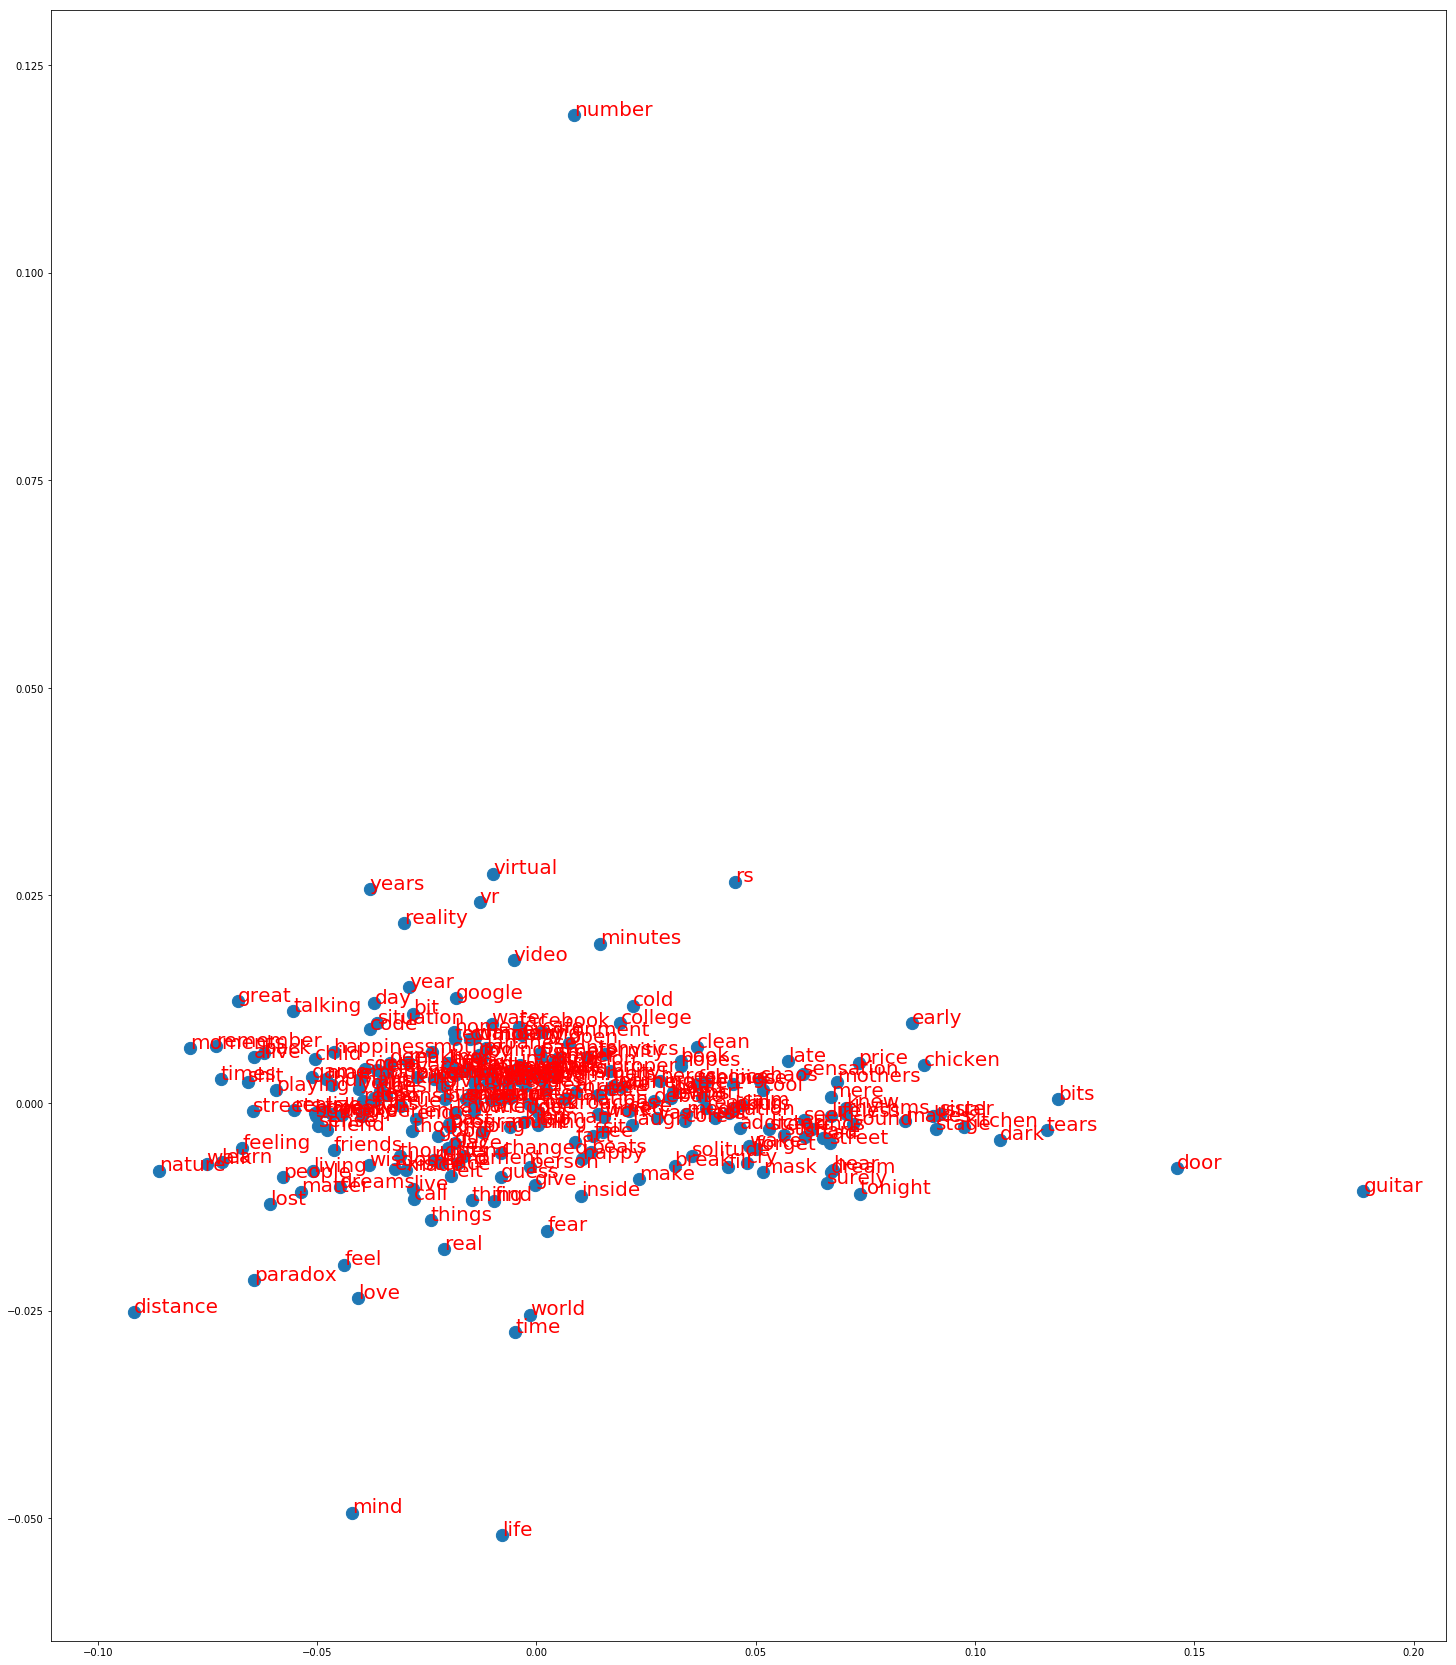

In [25]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 25, 30

# visualize in 2d space
#print(vectors)
Xp = comp2d[:, 0]
Yp = comp2d[:, 1]
#plt.scatter(Xp, Yp)

# plot
fig, ax = plt.subplots()
#ax = Axes3D(fig)
ax.scatter(Xp, Yp, s=150)

#indices = range(0, 20)
for i, txt in enumerate(vocabs_topn):
#for i in range(0, 75):
    ax.annotate(vocabs_topn[i], (Xp[i],Yp[i]), color='red', size=20)

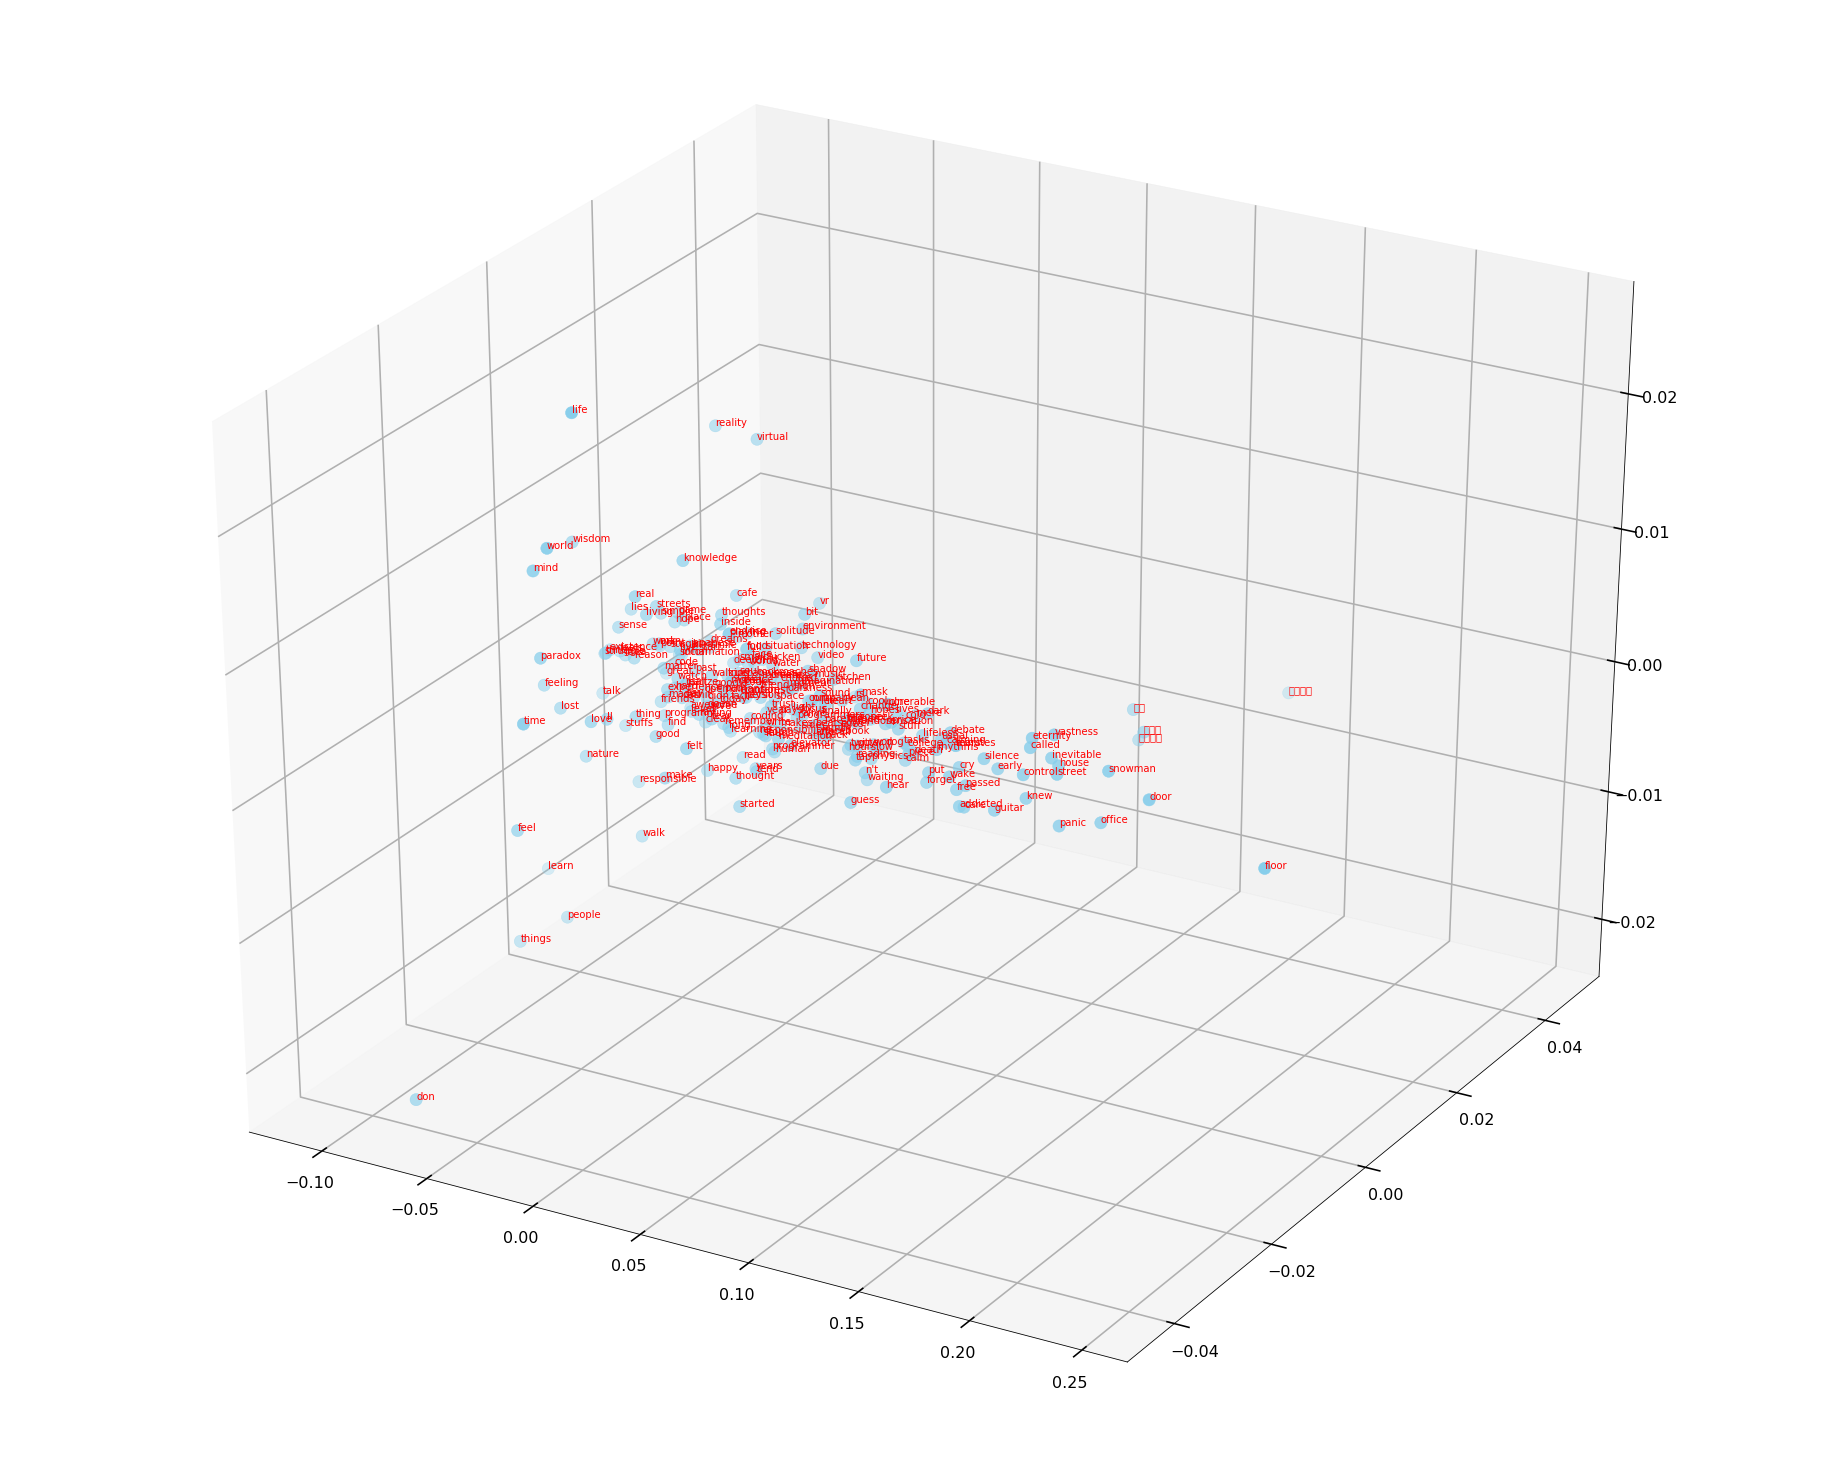

In [124]:
%matplotlib qt
plt.rcParams['figure.figsize'] = 25, 20
# visualize in 3d space
Xp = comp3d[:, 0]
Yp = comp3d[:, 1]
Zp = comp3d[:, 2]

# plot
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.scatter(Xp, Yp, Zp, c='skyblue', s=150)

for i, txt in enumerate(vocabs_topn):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    ax.text(Xp[i], Yp[i], Zp[i], txt, color='red')
plt.show()

# TSNE

In [ ]:
#tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
tsne_model = TSNE(n_components=2)
snevals = tsne_model.fit_transform(word2vec.wv.vectors)
#snevals = tsne_model.fit_transform(vectors)

In [41]:
# plot shit
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, snevals[word2vec.wv.vocab[word].index])
            for word in word2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [42]:
points.head()

,word,x,y
0,the,-32.810753,-25.204386
1,cafe,-37.602047,-9.868223
2,journal,51.461220,14.841290
3,with,-34.414871,-12.351995
4,no,-38.605572,-17.455599


In [43]:
snevals.shape, points.shape

((2031, 2), (2031, 3))

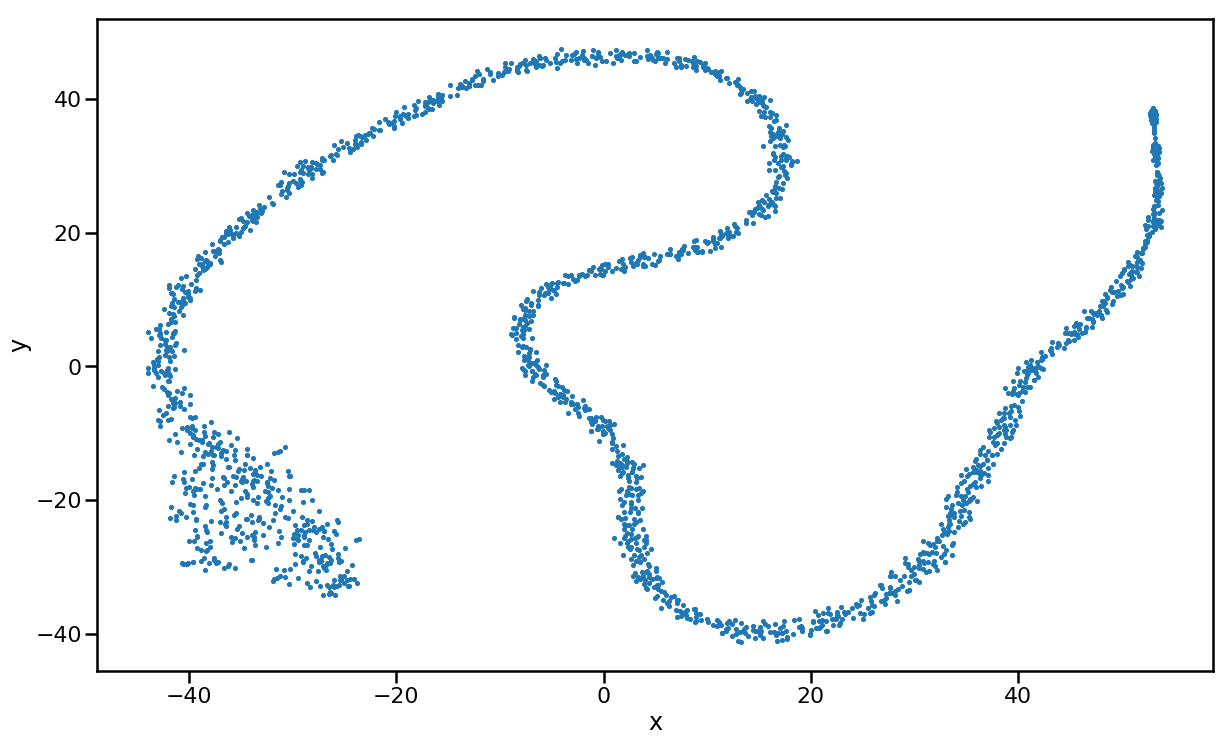

In [44]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

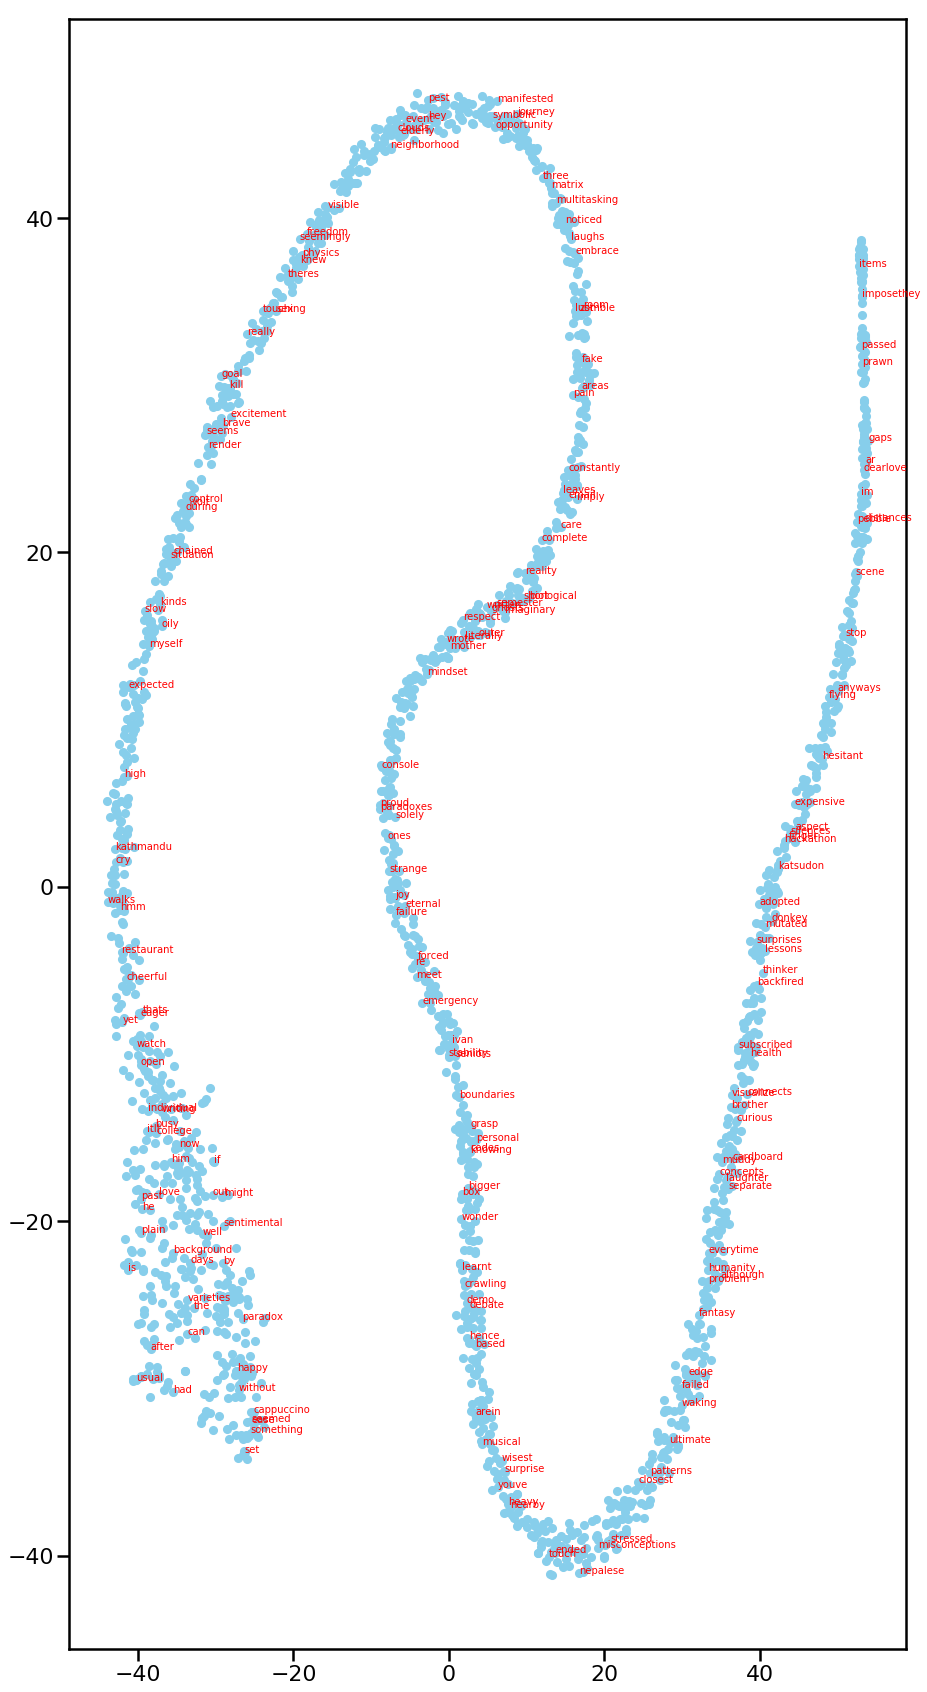

In [45]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 30
Xt = snevals[:, 0]
Yt = snevals[:, 1]
#plt.scatter(Xp, Yp)

# plot
fig, ax = plt.subplots()
#ax = Axes3D(fig)
ax.scatter(Xt, Yt, c='skyblue', s=50)

for i in range(0, len(points), 10):
#for i, text in enumerate(word2vec.wv.vocab):
    ax.annotate(points['word'][i], (Xt[i],Yt[i]), color='red')